# Deliverable 2

This file contains the combined code for delivarable 2 by Navya Jain.

#### Hypothesis A: Participants’ age will negatively correlate with financial and material stability (the last two questions on the Flourishing Scale)

by Navya Jain

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#loading the flourishing scala data into a CSV file
#uploading friday_am.xlsx and Demographic.csv when prompted to upload files
from google.colab import files
uploaded = files.upload()
import io

Saving Demographic.csv to Demographic.csv
Saving friday_am.xlsx to friday_am (1).xlsx


In [9]:
#loading the data into dataframes
flourishing = pd.read_excel(io.BytesIO(uploaded['friday_am.xlsx']))

In [10]:
print(flourishing.columns)

Index(['mbl_cod', 'rsp_id', 'ts', 'local_time', 'LOCATION_AM',
       'DISCOMFORT_SLIDER', 'LIFE_SATISFACTION', 'HAPPINESS',
       'PHYSICAL_HEALTH', 'MENTAL_HEALTH', 'WORTHWHILE', 'PURPOSE',
       'PROMOTE_GOOD', 'DELAYED_HAPPINESS', 'CONTENT_RELATIONSHIPS',
       'SATISFYING_RELATIONSHIPS', 'LIVING_EXPENSES', 'FOOD_HOUSING', 'STRESS',
       'PULSE_OX', 'HEART_RATE', 'RESPIRATION', 'BODY_BATTERY', 'STEPS',
       'CALORIES', 'FLOORS', 'INTENSITY_MINUTES', 'AVG_AMP', 'VOX_ACTV'],
      dtype='object')


In [11]:
df = flourishing[['mbl_cod','LIVING_EXPENSES', 'FOOD_HOUSING']]

In [12]:
#loading the ages of participants
ages = pd.read_csv(io.BytesIO(uploaded['Demographic.csv']))

In [13]:
print(ages.columns)

Index(['Mobile ID', 'State', 'Age ', 'Industry'], dtype='object')


In [14]:
df2 = df.groupby('mbl_cod').mean().reset_index()[['mbl_cod', 'LIVING_EXPENSES', 'FOOD_HOUSING']]

In [15]:
results = pd.merge(ages[['Mobile ID', 'Age ']], df2, left_on='Mobile ID', right_on='mbl_cod')
results = results[['Mobile ID', 'Age ', 'LIVING_EXPENSES', 'FOOD_HOUSING']]

In [16]:
results.head()

,Mobile ID,Age,LIVING_EXPENSES,FOOD_HOUSING
0,82420964,33,6.000000,7.666667
1,56954906,46,11.000000,11.000000
2,27361835,33,11.000000,11.000000
3,70975009,40,7.176471,7.705882
4,17180706,37,5.500000,6.000000


Correlation between Age and Living Expenses (flourishing scale) =  -0.09604645381988328


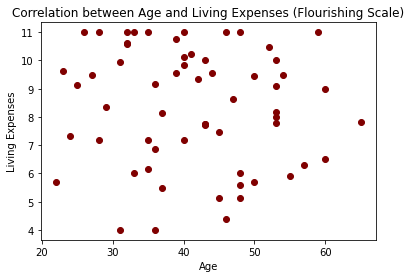

In [17]:
#correlation between age and living exp
cor1 = results['Age ']. corr(results['LIVING_EXPENSES'])
plt.scatter(results['Age '], results['LIVING_EXPENSES'], color = 'maroon')
plt.xlabel('Age')
plt.ylabel('Living Expenses')
print('Correlation between Age and Living Expenses (flourishing scale) = ', cor1)
plt.title('Correlation between Age and Living Expenses (Flourishing Scale)')
plt.show()

Correlation between Age and Food-housing expenses (flourishing scale) =  -0.19388899147013935


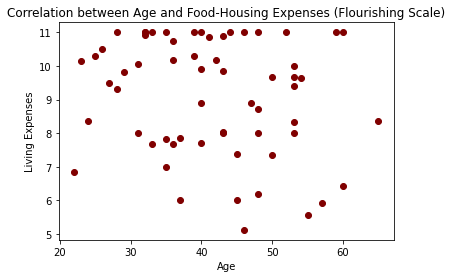

In [18]:
#correlation between age and food, housing
cor2 = results['Age ']. corr(results['FOOD_HOUSING'])
print('Correlation between Age and Food-housing expenses (flourishing scale) = ', cor2)
plt.scatter(results['Age '], results['FOOD_HOUSING'], color = 'maroon')
plt.xlabel('Age')
plt.ylabel('Living Expenses')
plt.title('Correlation between Age and Food-Housing Expenses (Flourishing Scale)')
plt.show()

### Garmin data

In [19]:
#loading the flourishing scala data into a CSV file
#uploading garmin.11822993.csv when prompted to upload files
from google.colab import files
uploaded = files.upload()
import io

Saving garmin.11822993.csv to garmin.11822993.csv


In [20]:
#loading the data into dataframes
garmin1 = pd.read_csv(io.BytesIO(uploaded['garmin.11822993.csv']))

In [21]:
garmin1.head()

,ts,dte_tme,rsp_id,data_type,val
0,1.651253e+09,2022-04-29 12:20:01,32680,calories,988
1,1.651253e+09,2022-04-29 12:21:01,32680,calories,989
2,1.651253e+09,2022-04-29 12:22:21,32680,hr,0
3,1.651253e+09,2022-04-29 12:22:22,32680,steps,0
4,1.651253e+09,2022-04-29 12:22:22,32680,calories,0


In [22]:
garmin1['data_type'].unique()

array(['calories', 'hr', 'steps', 'floorsClimbed', 'intensityMinutes',
       'pulseOx', 'ibi', 'stress'], dtype=object)

#### Calories

In [26]:
cal1 = garmin1[garmin1['data_type'] == 'calories']
cal1.head()

,ts,dte_tme,rsp_id,data_type,val
0,1.651253e+09,2022-04-29 12:20:01,32680,calories,988
1,1.651253e+09,2022-04-29 12:21:01,32680,calories,989
4,1.651253e+09,2022-04-29 12:22:22,32680,calories,0
8,1.651253e+09,2022-04-29 12:22:32,32680,calories,990
9,1.651253e+09,2022-04-29 12:23:02,32680,calories,992


<ipython-input-24-40a3e5f192d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calories['dte_tme'] = pd.to_datetime(df_calories['dte_tme'])


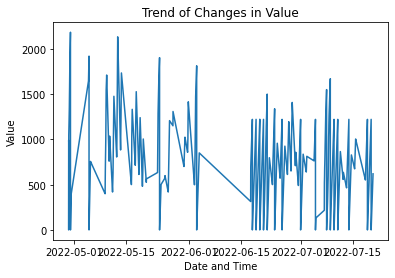

In [24]:
#only for visualizations
df_calories = cal1
df_calories['dte_tme'] = pd.to_datetime(df_calories['dte_tme'])

# set the 'dte_tme' column as the index
df_calories.set_index('dte_tme', inplace=True)

# create the plot
plt.plot(df_calories.index, df_calories['val'])

# set the axis labels
plt.xlabel('Date and Time')
plt.ylabel('Value')

# set the title
plt.title('Trend of Changes in Value')

# display the plot
plt.show()


In [27]:
cal1['Dates'] = pd.to_datetime(cal1['dte_tme']).dt.date
cal1['Time'] = pd.to_datetime(cal1['dte_tme']).dt.time

<ipython-input-27-017682cb88d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal1['Dates'] = pd.to_datetime(cal1['dte_tme']).dt.date
<ipython-input-27-017682cb88d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal1['Time'] = pd.to_datetime(cal1['dte_tme']).dt.time


In [28]:
cal1_date = cal1.groupby('Dates').mean('val').reset_index()[['Dates', 'val']]

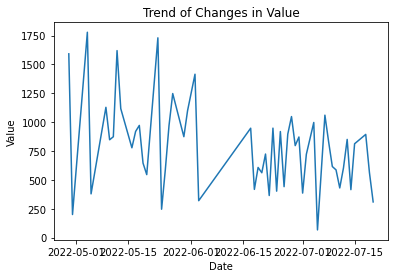

In [29]:
#daily trend

# set the 'dte_tme' column as the index
cal1_date.set_index('Dates', inplace=True)

# create the plot
plt.plot(cal1_date.index, cal1_date['val'])

# set the axis labels
plt.xlabel('Date')
plt.ylabel('Value')

# set the title
plt.title('Trend of Changes in Value')

# display the plot
plt.show()

#### Correlation between monthly calorie intake and physical health's flourishing score

In [30]:
#finding monthly calorie intake
cal1.head()

,ts,dte_tme,rsp_id,data_type,val,Dates,Time
0,1.651253e+09,2022-04-29 12:20:01,32680,calories,988,2022-04-29,12:20:01
1,1.651253e+09,2022-04-29 12:21:01,32680,calories,989,2022-04-29,12:21:01
4,1.651253e+09,2022-04-29 12:22:22,32680,calories,0,2022-04-29,12:22:22
8,1.651253e+09,2022-04-29 12:22:32,32680,calories,990,2022-04-29,12:22:32
9,1.651253e+09,2022-04-29 12:23:02,32680,calories,992,2022-04-29,12:23:02


In [31]:
df = flourishing[['rsp_id','ts', 'local_time', 'PHYSICAL_HEALTH']]

In [32]:
cal1['Dates'] = pd.to_datetime(cal1['Dates'])
cal_month = cal1.groupby(cal1['Dates'].dt.strftime('%Y-%m'))['val'].mean().reset_index()

<ipython-input-32-7fc326e1b076>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal1['Dates'] = pd.to_datetime(cal1['Dates'])


In [33]:
df2 = df[df['rsp_id']==32680]
print(df.shape)
print(df2.shape)

(777, 4)
(12, 4)


In [34]:
df2['Dates'] = pd.to_datetime(df2['local_time']).dt.date
df2['Time'] = pd.to_datetime(df2['local_time']).dt.time

<ipython-input-34-4a2d0d60244e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Dates'] = pd.to_datetime(df2['local_time']).dt.date
<ipython-input-34-4a2d0d60244e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time'] = pd.to_datetime(df2['local_time']).dt.time


In [35]:
fp_month = df2
fp_month['Dates'] = pd.to_datetime(fp_month['Dates'])
fp_avm = fp_month.groupby(fp_month['Dates'].dt.strftime('%Y-%m'))['PHYSICAL_HEALTH'].mean().reset_index()

<ipython-input-35-0a9ddf75ca57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_month['Dates'] = pd.to_datetime(fp_month['Dates'])


In [38]:
fp_avm

,Dates,PHYSICAL_HEALTH
0,2022-05,6.0
1,2022-06,8.5
2,2022-07,7.2
3,2022-08,6.0


In [37]:
cal_month

,Dates,val
0,2022-04,1167.732794
1,2022-05,927.058754
2,2022-06,680.956674
3,2022-07,649.632860


In [36]:
data = {
    'dates':['2022-05', '2022-06', '2022-07'],
    'calories':[927.058754, 680.956674, 649.632860],
    'physical_health': [6.0, 8.5, 7.2]
}

cor_df = pd.DataFrame(data)

In [39]:
cor_df

,dates,calories,physical_health
0,2022-05,927.058754,6.0
1,2022-06,680.956674,8.5
2,2022-07,649.632860,7.2


In [40]:
cor = cor_df['calories'].corr(cor_df['physical_health'])

Correlation between Calorie intake and Physical health (flourishing scale) =  -0.7961125935427582


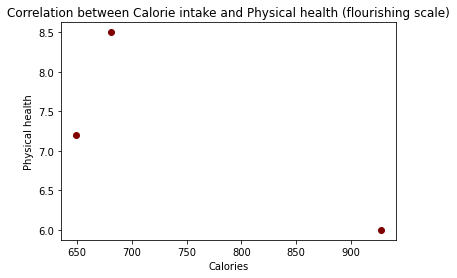

In [41]:
print('Correlation between Calorie intake and Physical health (flourishing scale) = ', cor)
plt.scatter(cor_df['calories'], cor_df['physical_health'], color = 'maroon')
plt.xlabel('Calories')
plt.ylabel('Physical health')
plt.title('Correlation between Calorie intake and Physical health (flourishing scale)')
plt.show()